# Bayesian optimization of a time-consuming simulator

The aim of the lab is to optimize a time-consuming simulator using the Efficient Global Optimization (EGO) method. As a toy example, the simulator chosen here mimics a catapult. There are 4 input variables, tuning the catapult, and 1 output, giving the distance of the projectile mark to the catapult. We want to find the value(s) of the input variable(s) maximizing that distance. Notice that the simulator is not time-consuming. However, for the sake of realism, we will limit the computational budget to 36 runs.

1. "By-hand" Optimization
<br> We provide here a shiny application (authored by Nicolas Durrande), which allows using the simulator interactively. Alternatively, you can use the web application, available here : https://durrande.shinyapps.io/catapult/

In [1]:
library(shiny)
runApp()

*Question: By playing with the simulator, propose a set of input values giving the largest possible value of the output. Here we consider the noise-free case, by fixing the wind to zero.*

To continue running the notebook, you may need to interrupt the kernel (square symbol!). Then load the two following scripts, containing useful functions. 

In [2]:
source("catapultSettings.R")
source("catapultFunctions.R")

2. Let us create an initial design of experiences and compute the corresponding values.

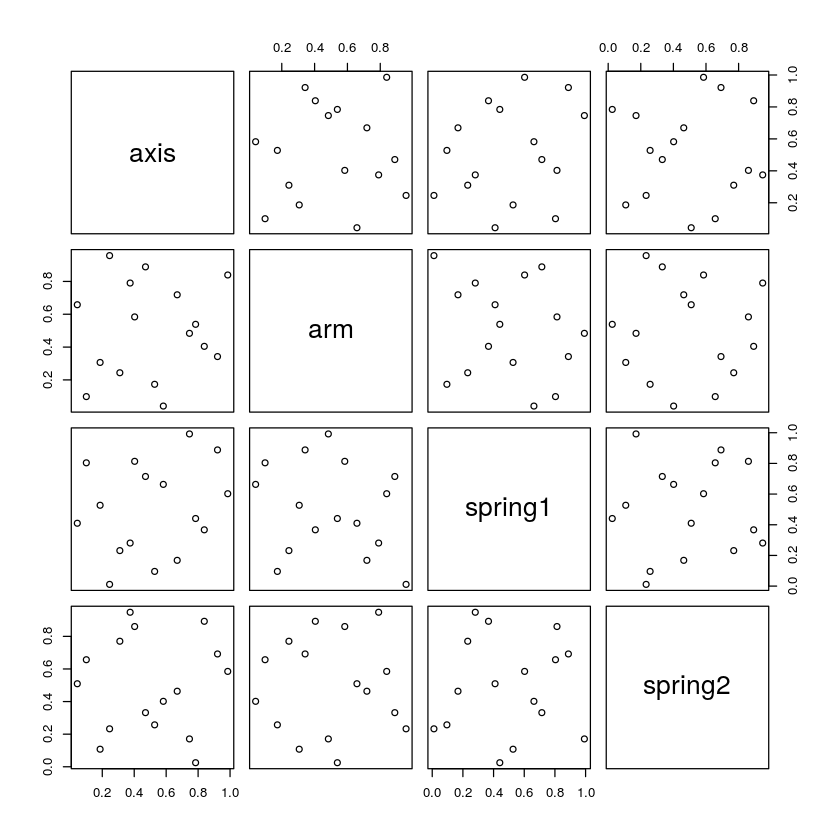

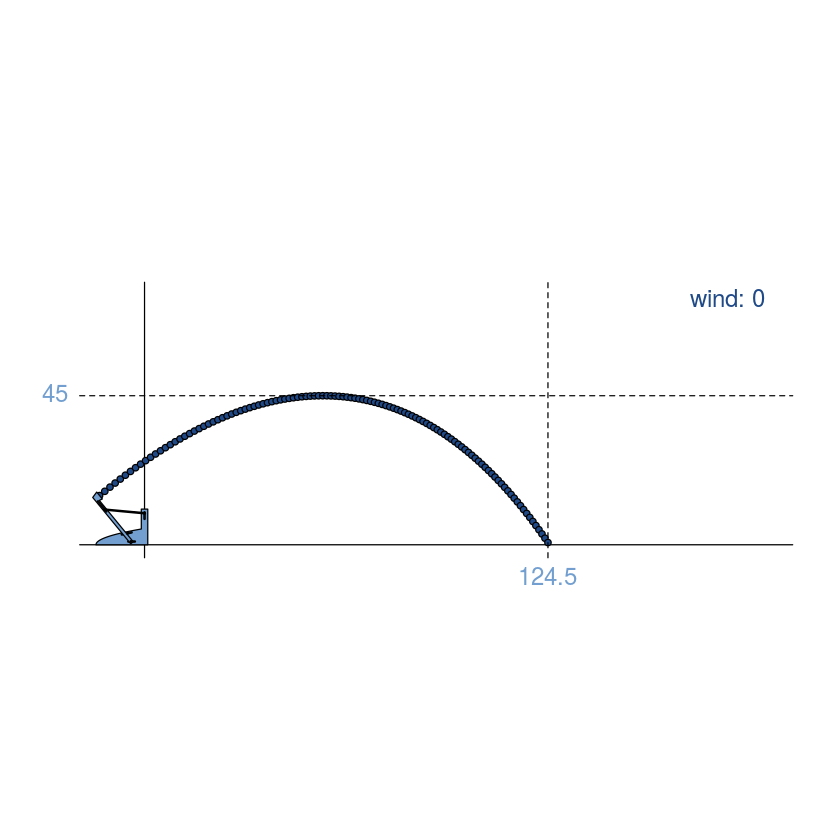

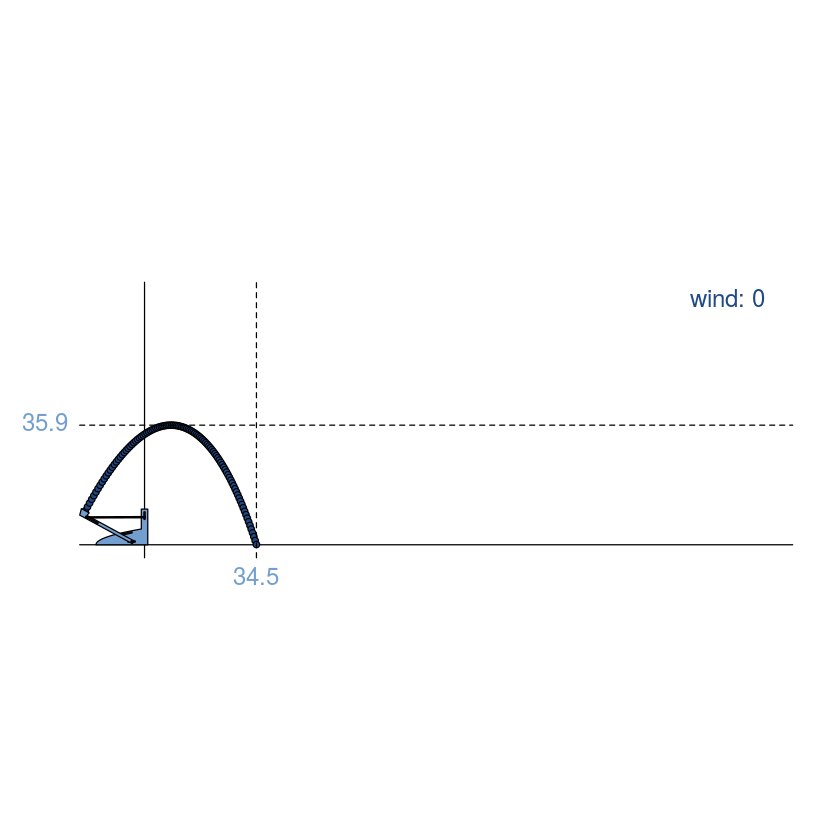

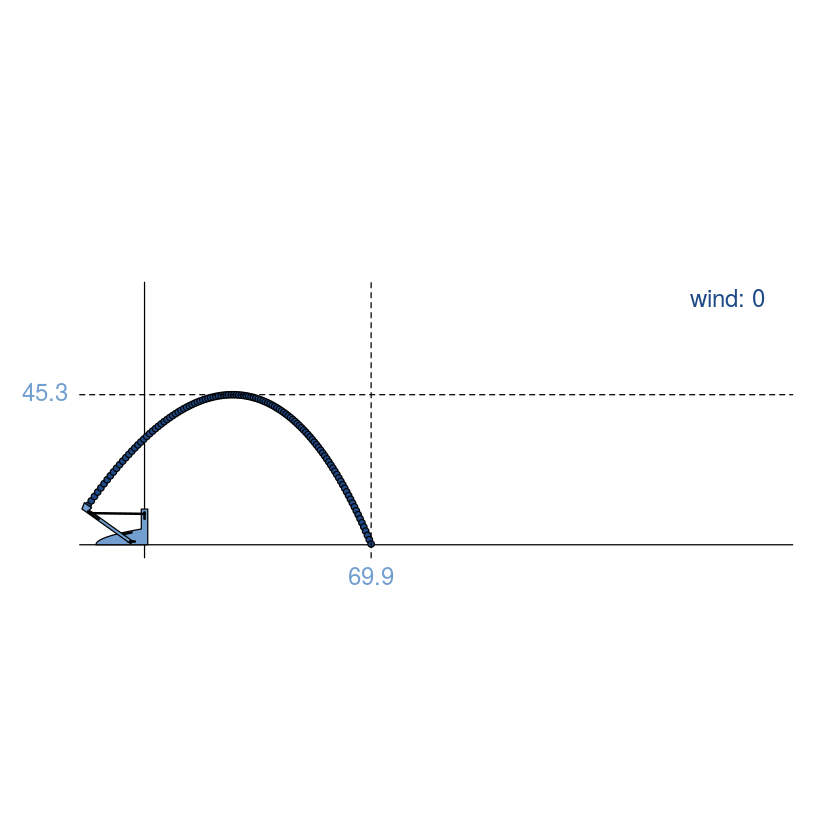

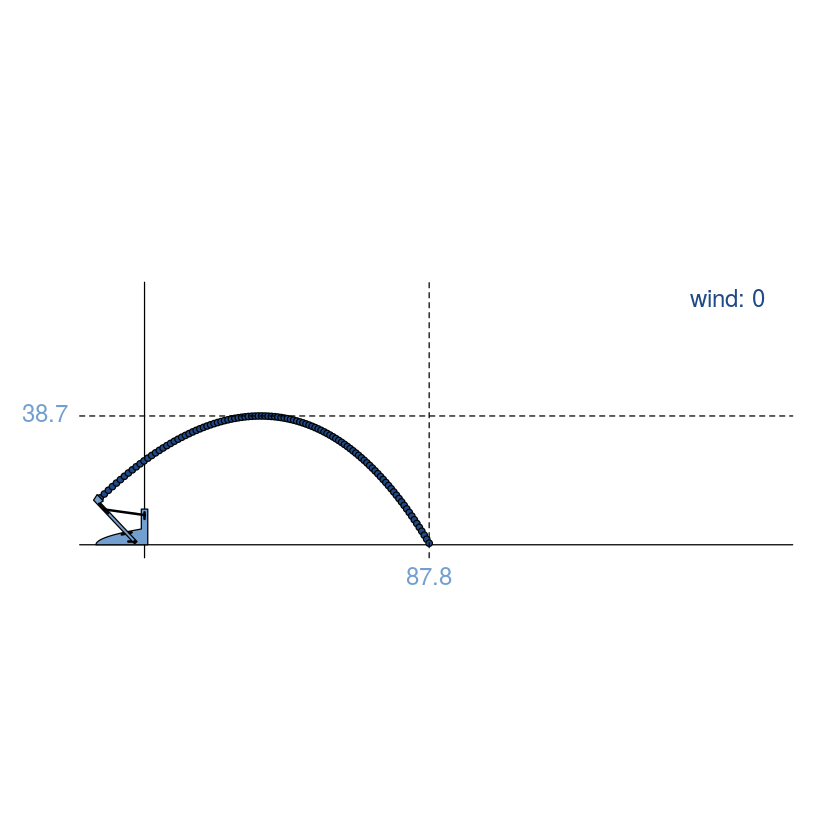

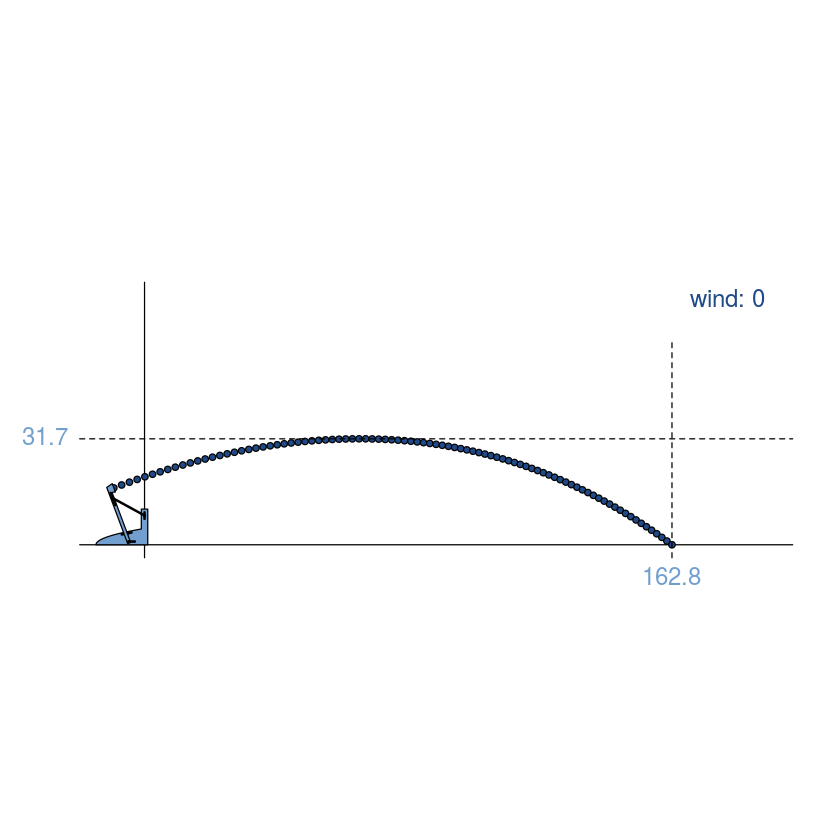

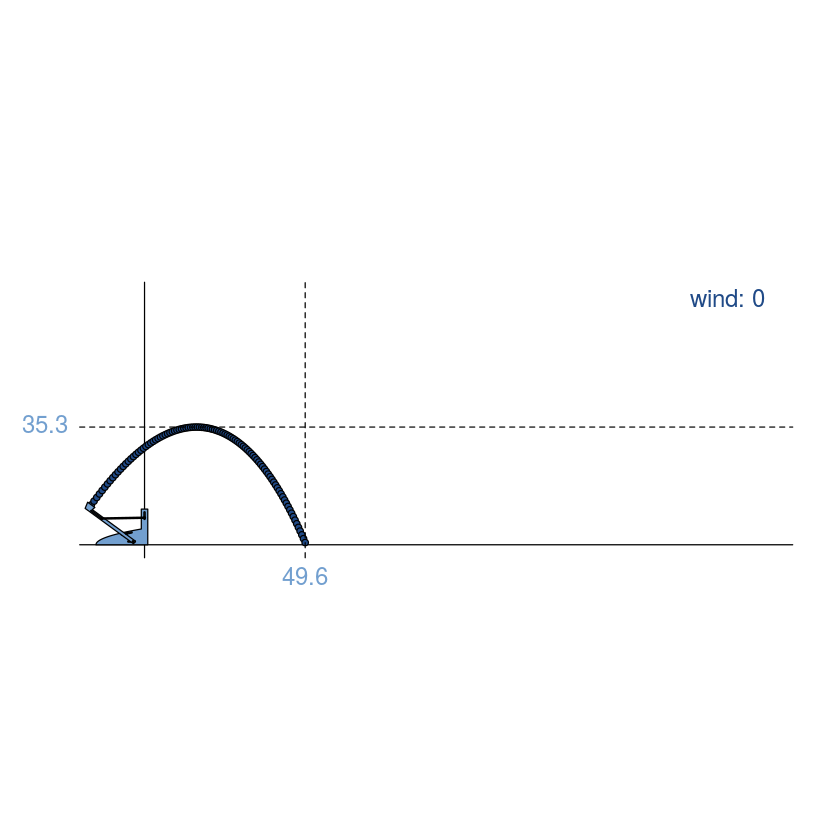

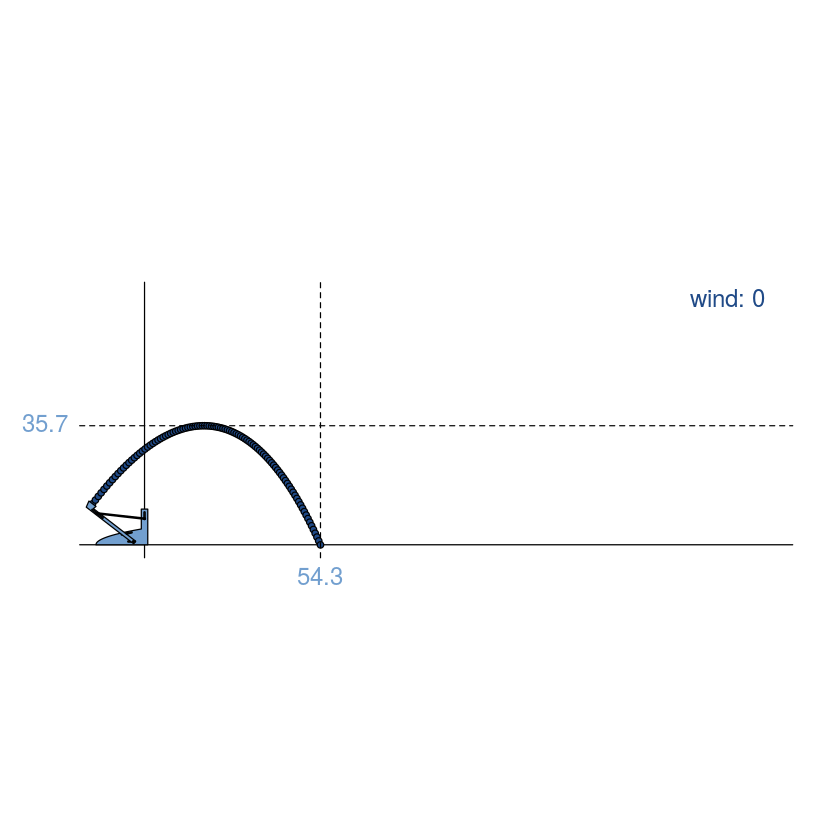

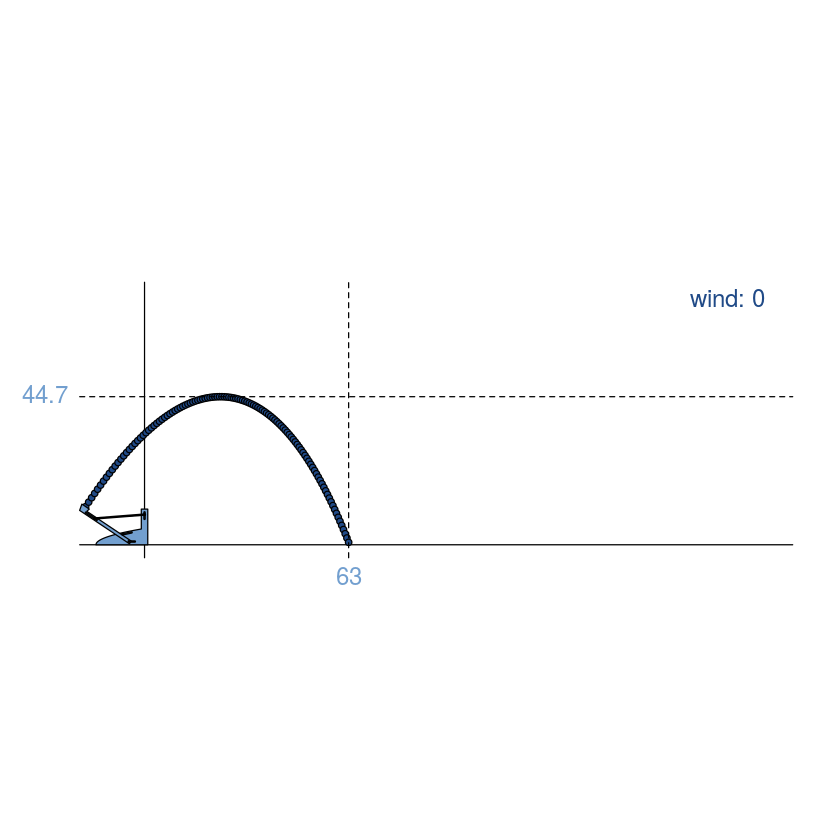

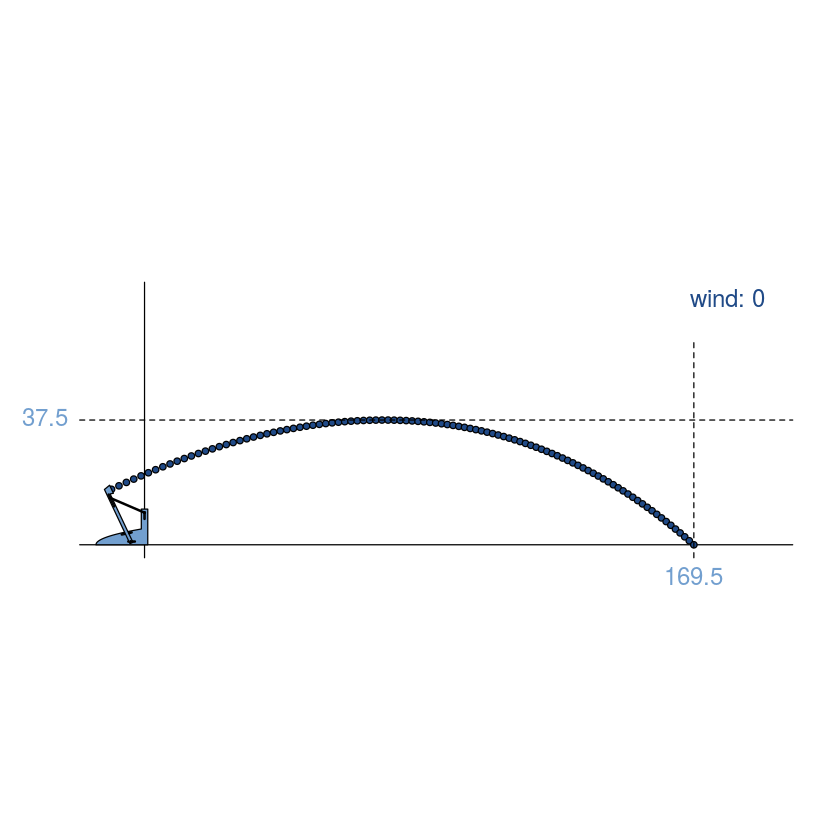

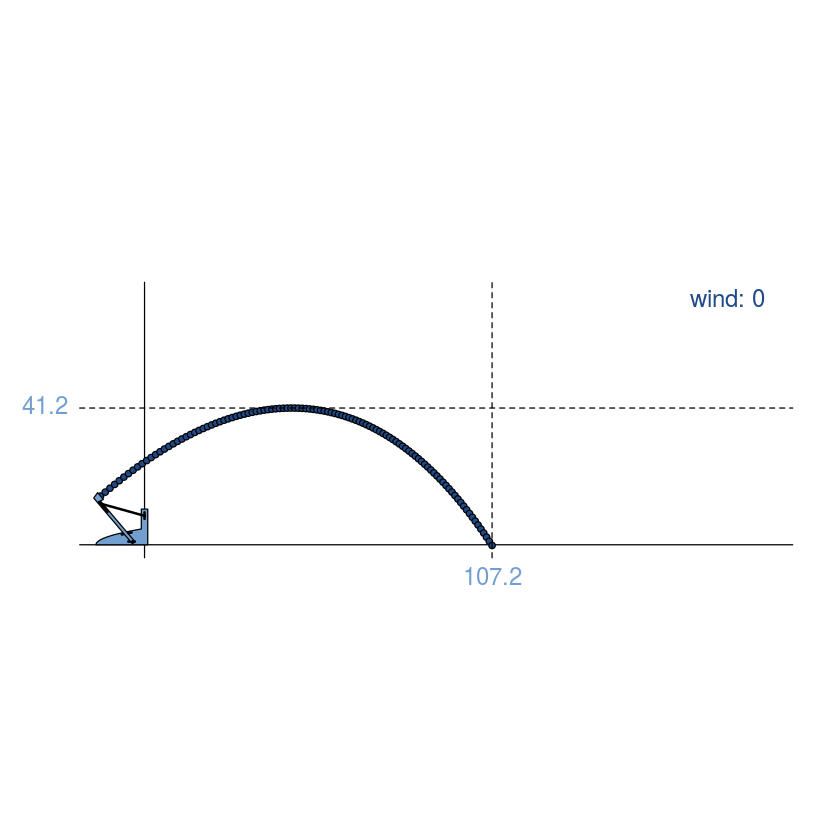

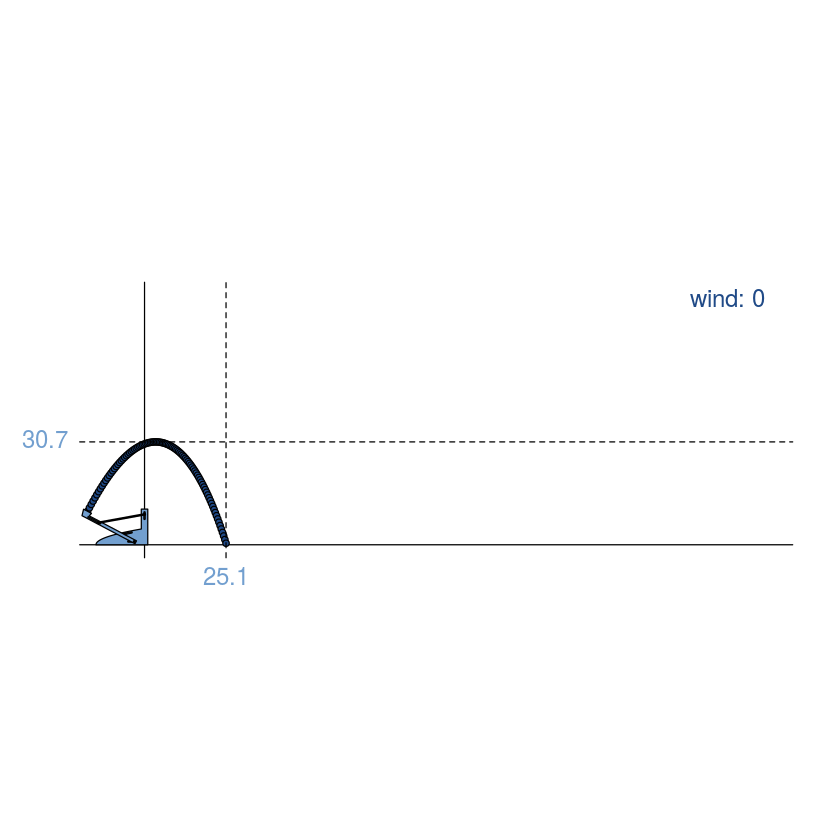

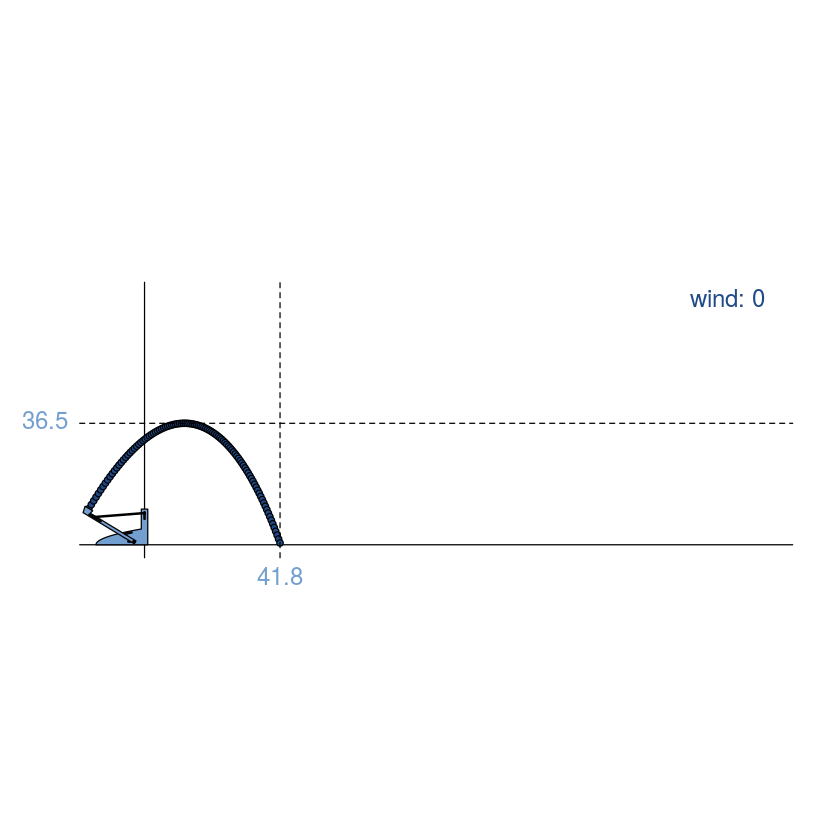

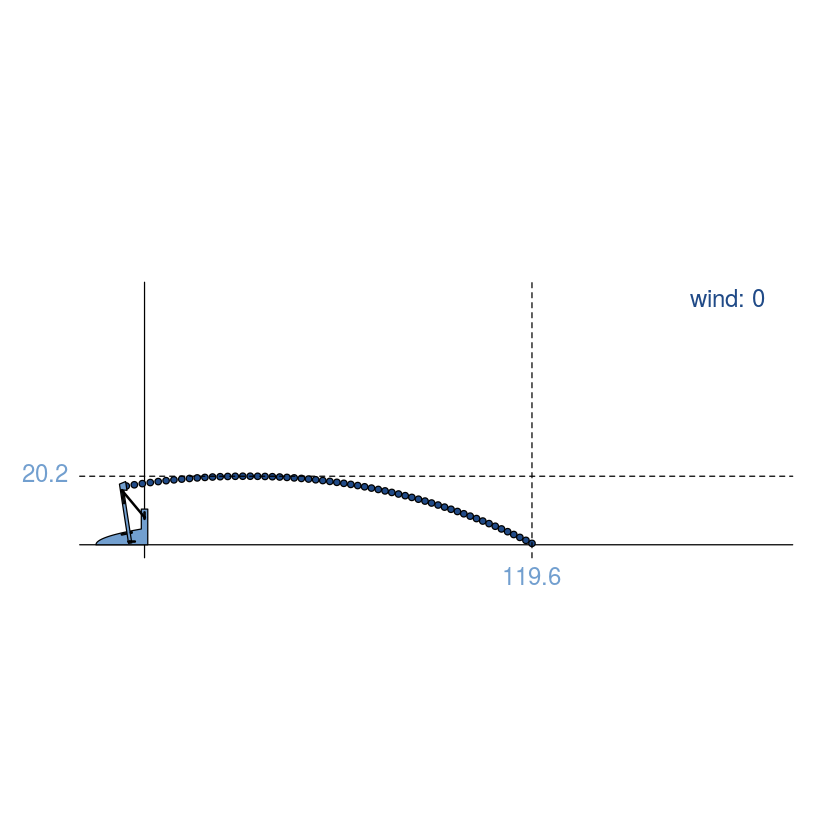

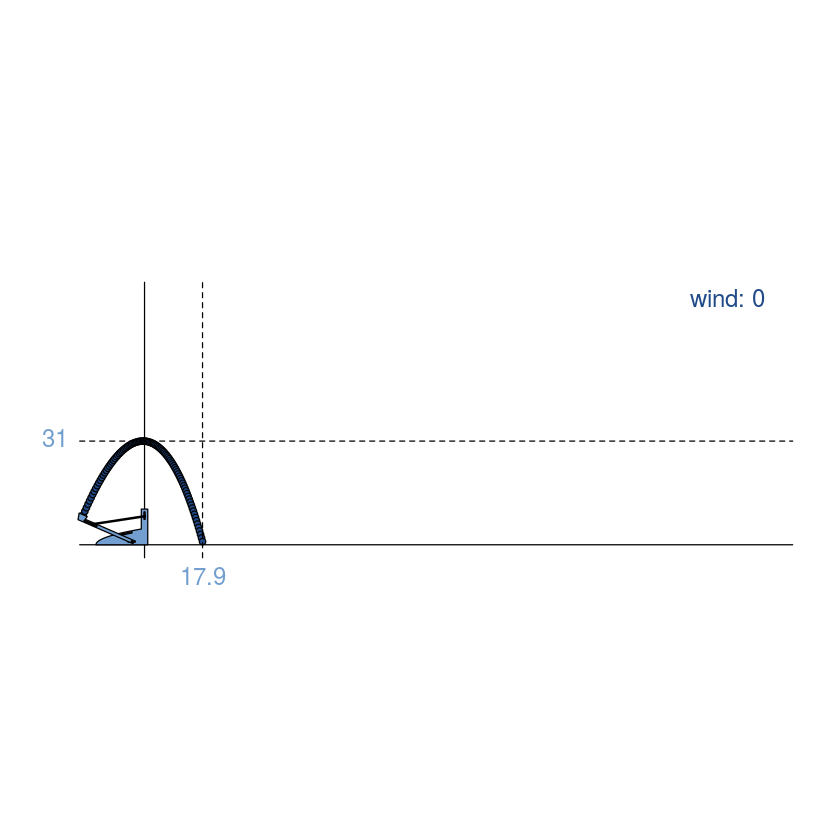

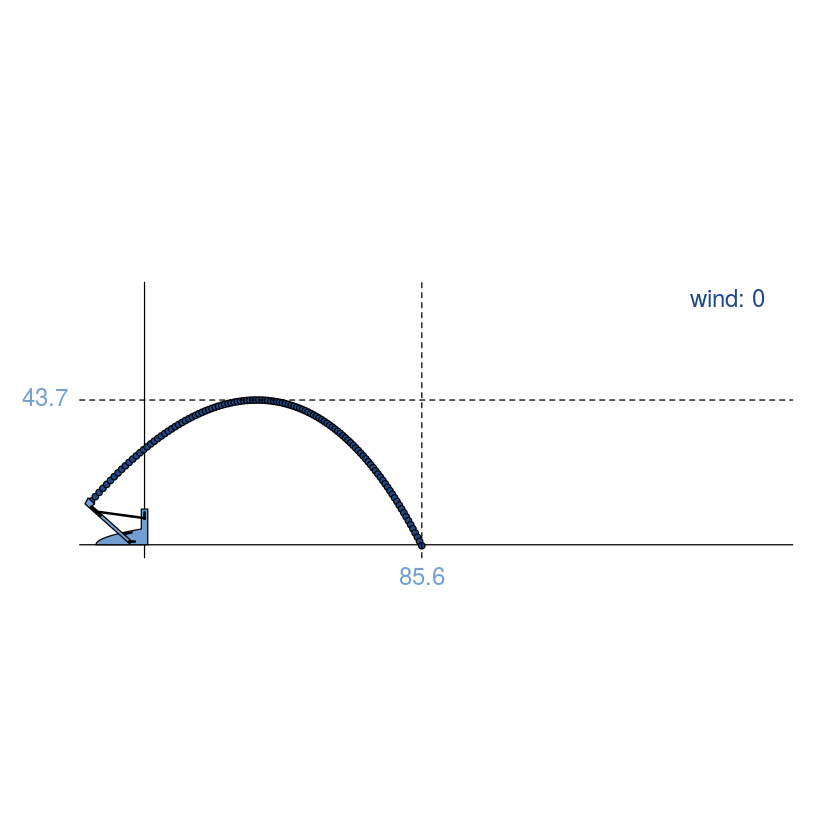

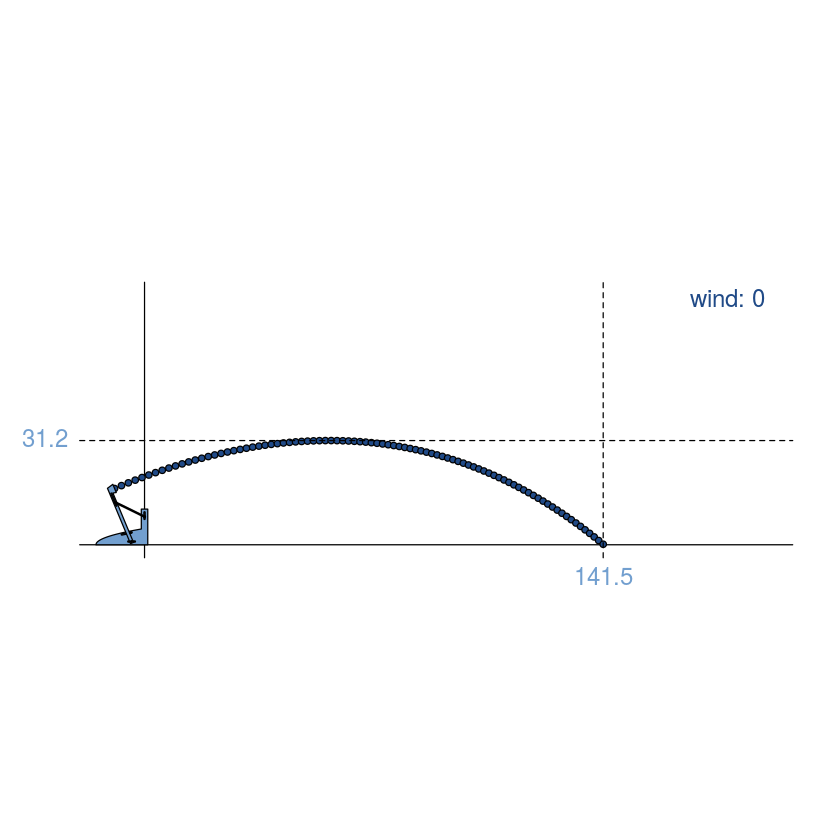

In [3]:
library(DiceDesign)
set.seed(0)
X0 <- lhsDesign(n = 16, dimension = 4)$design
Xopt <- maximinESE_LHS(X0, it=10)
## you may be interested in the convergence
#plot(Xopt$critValues,type="l")
X <- Xopt$design
colnames(X) <- c("axis", "arm", "spring1", "spring2")
pairs(X)
## compute the output values
Y <- apply(X, 1, runExperiment, windFactor = 0)[1, ]

Question : Observe that the design of experiments is "space-filling". <br> Why did we chose that kind of designs? What is the current maximum? Is it far from the maximum value found by-hand?

3. Descriptive statistics. 
<br> *Question : Can you see a simple input-output relation? What can you say about the area corresponding to the maximum value?*

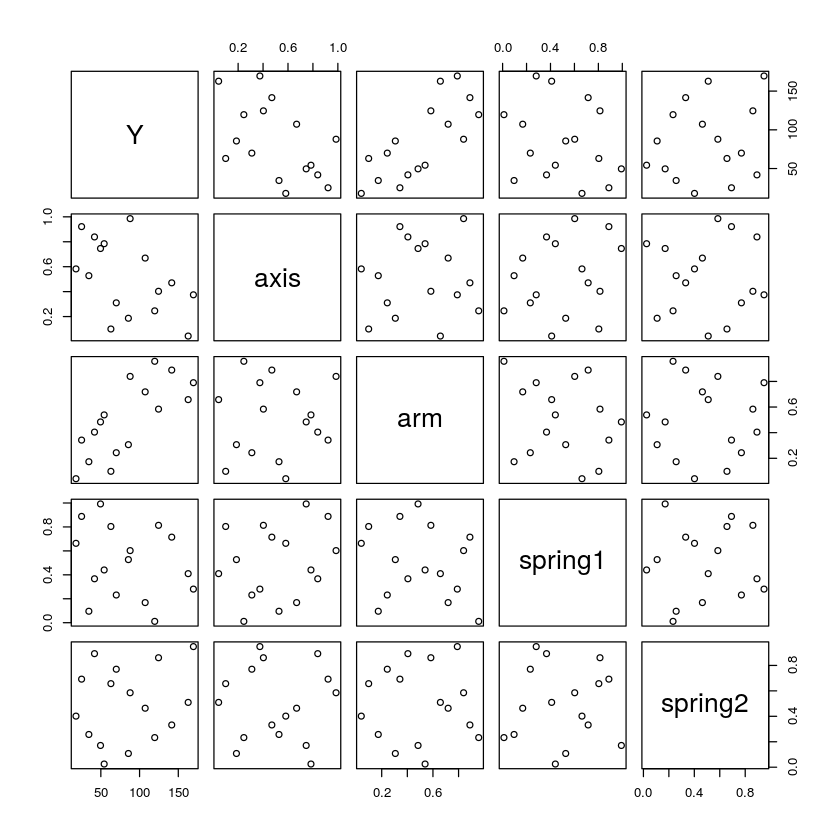

In [4]:
pairs(cbind(Y, X))

4. Regression metamodel.
<br> *Question : Try the linear models below. If you replace the simulator by one of this model, what would be the optimum? Is it far from your previous guess?*

In [5]:
myData <- data.frame(X, Y = Y)
m <- lm(Y ~ ., data = myData)
summary(m)
m2 <- lm(Y~. + I(axis^2) + I (arm^2) + I (spring1^2) + I(spring2^2), data = myData)
summary(m2)
mstep <- step(object = m, scope = m2, direction = "both", k = log(length(Y)))
summary(mstep)


Call:
lm(formula = Y ~ ., data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.039  -6.822   3.284   8.429  19.947 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   43.442     14.715   2.952   0.0132 *  
axis         -94.728     14.702  -6.443 4.79e-05 ***
arm          133.968     14.926   8.975 2.15e-06 ***
spring1        9.992     14.879   0.672   0.5157    
spring2       34.737     14.304   2.428   0.0335 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.18 on 11 degrees of freedom
Multiple R-squared:  0.9178,	Adjusted R-squared:  0.8879 
F-statistic: 30.71 on 4 and 11 DF,  p-value: 6.505e-06



Call:
lm(formula = Y ~ . + I(axis^2) + I(arm^2) + I(spring1^2) + I(spring2^2), 
    data = myData)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9594  -5.6659   0.7522   3.9702  19.6448 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -21.0446    26.4646  -0.795  0.45261   
axis            0.1668    50.5636   0.003  0.99746   
arm           247.5940    57.4033   4.313  0.00351 **
spring1       127.3872    45.7239   2.786  0.02706 * 
spring2        95.2826    55.9721   1.702  0.13248   
I(axis^2)     -97.4990    48.8345  -1.997  0.08606 . 
I(arm^2)     -108.9512    55.8117  -1.952  0.09188 . 
I(spring1^2) -115.9251    43.4639  -2.667  0.03213 * 
I(spring2^2)  -66.8304    55.7753  -1.198  0.26982   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.44 on 7 degrees of freedom
Multiple R-squared:  0.9691,	Adjusted R-squared:  0.9337 
F-statistic: 27.41 on 8 and 7 DF,  p-value: 0.0001298


Start:  AIC=96.95
Y ~ axis + arm + spring1 + spring2

          Df Sum of Sq     RSS     AIC
- spring1  1     118.1  2998.5  94.823
<none>                  2880.4  96.952
- spring2  1    1544.1  4424.5 101.048
- axis     1   10871.3 13751.7 119.192
- arm      1   21093.6 23973.9 128.084

Step:  AIC=94.82
Y ~ axis + arm + spring2

          Df Sum of Sq     RSS     AIC
<none>                  2998.5  94.823
- spring2  1    1588.7  4587.2  98.853
- axis     1   10990.0 13988.4 116.692
- arm      1   21633.7 24632.1 125.745



Call:
lm(formula = Y ~ axis + arm + spring2, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.043  -7.734   3.574   8.641  18.583 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    48.21      12.59   3.829   0.0024 ** 
axis          -92.29      13.92  -6.632 2.42e-05 ***
arm           131.50      14.13   9.305 7.76e-07 ***
spring2        35.19      13.96   2.522   0.0268 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.81 on 12 degrees of freedom
Multiple R-squared:  0.9144,	Adjusted R-squared:  0.893 
F-statistic: 42.75 on 3 and 12 DF,  p-value: 1.108e-06


5. Now, let us try the EGO method (Bayesian optimization)
<br> *Question : Recall its main principles.*


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.883836 1.833285 1.96193 1.845633 
  - best initial criterion value(s) :  -71.58303 -72.40282 -73.31784 -74.01961 -76.69122 



Warning message:
“executing %dopar% sequentially: no parallel backend registered”


N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       71.583  |proj g|=       1.3684
At iterate     1  f =       71.496  |proj g|=       0.54595
At iterate     2  f =       71.385  |proj g|=       0.53956
At iterate     3  f =       71.162  |proj g|=        1.4093
At iterate     4  f =       71.053  |proj g|=        1.1724
At iterate     5  f =       70.996  |proj g|=       0.86951
At iterate     6  f =       70.919  |proj g|=       0.78931
At iterate     7  f =       70.897  |proj g|=       0.10908
At iterate     8  f =       70.897  |proj g|=        0.0117
At iterate     9  f =       70.897  |proj g|=    6.7266e-05
At iterate    10  f =       70.897  |proj g|=    4.9294e-05

iterations 10
function evaluations 13
segments explored during Cauchy searches 13
BFGS updates skipped 0
active bounds at final generalized Cauchy point 2
norm of the final projected gradient 4.92939e-05
final function value 70.8965

F = 70.8965
final

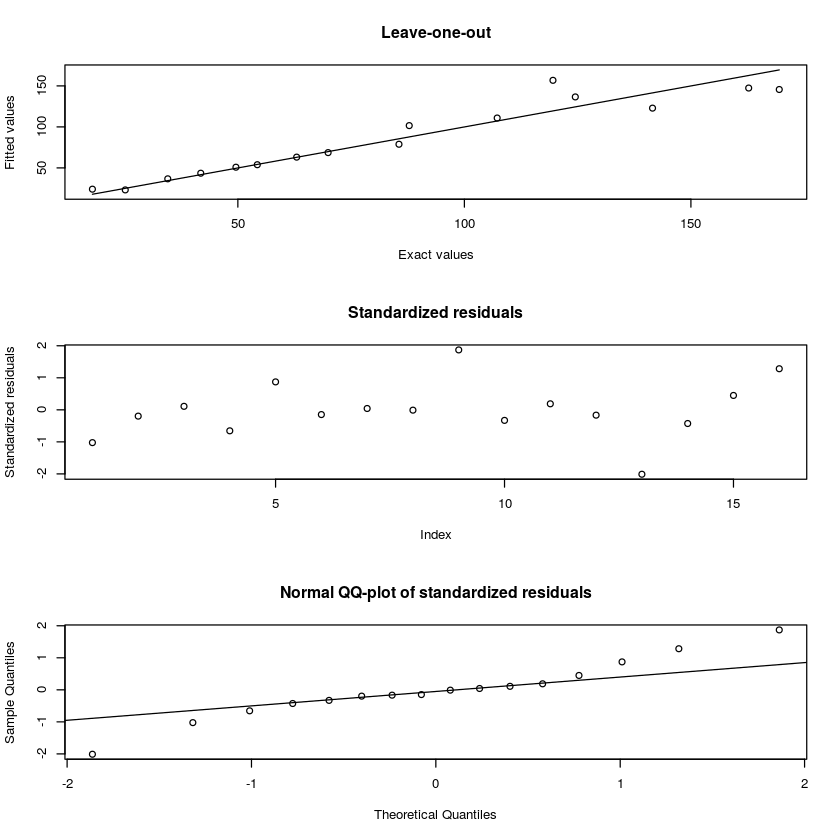

In [6]:
library(DiceKriging)
m0 <- km(~ 1, design = X, response = Y, multistart = 5)
print(m0)   # display model
plot(m0)    # visual model validation

*Questions: What is the role of the argument 'multistart'? What can you say about the performance and the validity of this first model?*

In [7]:
library(DiceOptim)

## We first transform the problem to a minimization one
runExperimentFun <- function(x) {
    - apply(trajectory(x, wind = 0), 2, max)[1]
}
Y <- apply(X, 1, runExperimentFun)
m0 <- km(~ 1, design = X, response = Y)

## Step 1 ##
oEGO <- max_EI(model = m0, lower = rep(0, 4), upper = rep(1, 4))
newX <- oEGO$par
newy <- runExperimentFun(newX)

cat("Expected improvement was:", round(oEGO$value, 2),
    "\nActual improvement is:", round(min(Y) - newy, 2),
    "\n   (>0 means the new point is better, <0 means it is worse)")


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.883836 1.833285 1.96193 1.845633 
  - best initial criterion value(s) :  -73.49734 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       73.497  |proj g|=      0.96321
At iterate     1  f =       71.382  |proj g|=        1.3796
At iterate     2  f =       71.337  |proj g|=        1.1252
At iterate     3  f =        71.15  |proj g|=       0.86764
At iterate     4  f =       71.117  |proj g|=       0.37446
At iterate     5  f =       70.977  |proj g|=        1.3794
At iterate     6  f =       70.942  |proj g|=       0.36291
At iterate     7  f =       70.919  |proj g|=       0.47223
At iterate     8  f =       70.905  |proj g|=      

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 1.637047e+01

Parameters at the Solution (parameter, gradient):

 X[ 1] :	7.200386e-02	G[ 1] :	2.026915e-06
 X[ 2] :	7.984118e-01	G[ 2] :	-3.017816e-05
 X[ 3] :	5.916519e-01	G[ 3] :	6.074871e-05
 X[ 4] :	1.000000e+00	G[ 4] :	1.286269e+01

Solution Found Generation 12
Number of Generations Run 12

Tue Oct 27 10:20:25 2020
Total run time : 0 hours 0 minutes and 0 seconds
Expected improvement was: 16.37 
Actual improvement is: -6.02 
   (>0 means the new point is better, <0 means it is worse)

In [8]:
# Then we update the model
m1 <- update(m0, newX, newy)
# and maximize again the expected improvement: 
## Step 2 ##
oEGO <- max_EI(model = m1, lower = rep(0, 4), upper = rep(1, 4))
newX <- oEGO$par
newy <- runExperimentFun(newX)

cat("Expected improvement was:", round(oEGO$value, 2),
    "\nActual improvement is:", round(min(m1@y) - newy, 2),
    "\n   (>0 means the new point is better, <0 means its worst)")


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.883836 1.833285 1.96193 1.845633 
  - best initial criterion value(s) :  -77.5807 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       77.581  |proj g|=       1.3382
At iterate     1  f =       77.239  |proj g|=       0.95873
At iterate     2  f =       76.646  |proj g|=        1.3656
At iterate     3  f =       76.329  |proj g|=       0.87406
At iterate     4  f =       76.123  |proj g|=        1.2675
At iterate     5  f =       75.914  |proj g|=       0.72175
At iterate     6  f =       75.611  |proj g|=        1.3235
At iterate     7  f =       75.536  |proj g|=       0.47299
At iterate     8  f =       75.392  |proj g|=       

In [9]:
# Fortunately, the loop (model update -> EI maximisation -> ...) is already implemented
oEGO <- EGO.nsteps(model = m0, fun = runExperimentFun, nsteps = 20, 
                   lower = rep(0, 4), upper = rep(1, 4))

bestPoint <- which.min(oEGO$value)
cat("longest shot observed:", - round(oEGO$value[bestPoint], 2),
    "\ncorresponding input values:", round(oEGO$par[bestPoint,], 2))




Tue Oct 27 10:20:25 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+00 
 0.000000e+00   <=  X2   <=    1.000000e+00 
 0.000000e+00   <=  X3   <=    1.000000e+00 
 0.000000e+00   <=  X4   <=    1.000000e+00 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	6
	(3) Boundary Mutation................. 	6
	(4) Non-Uniform Mutation.............. 	6
	(5) Polytope Crossover................ 	6
	(6) Simple Crossover.................. 	6
	(7) Whole Non-Uniform Mutation........ 	6
	(8) Heuristic Crossover............... 	6
	(9) Local-Minimum Crossover........... 	0

HARD Maximum Number of Generations: 12
Maximum Nonchanging Generations: 2
Population size       : 48
Convergence Tolerance: 1.000000e-21

Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Not Using Out of Bounds Individuals and Not Allowing Trespassing.


Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 1.637047e+01

Parameters at the Solution (parameter, gradient):

 X[ 1] :	7.200384e-02	G[ 1] :	3.853572e-07
 X[ 2] :	7.984119e-01	G[ 2] :	-1.131613e-05
 X[ 3] :	5.916530e-01	G[ 3] :	-1.241520e-07
 X[ 4] :	1.000000e+00	G[ 4] :	1.286268e+01

Solution Found Generation 12
Number of Generations Run 12

Tue Oct 27 10:20:26 2020
Total run time : 0 hours 0 minutes and 1 seconds


Tue Oct 27 10:20:26 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+00 
 0.000000e+00   <=  X2   <=    1.000000e+00 
 0.000000e+00   <=  X3   <=    1.000000e+00 
 0.000000e+00   <=  X4   <=    1.000000e+00 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	6
	(3) Boundary Mutation................. 	6
	(4) Non-Uniform Mutation.............. 	6
	(5) Polytope Crossover................ 	6
	(6) Simple Crossover.................. 	6
	(7) Whole Non-Un

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 1.114924e-01

Parameters at the Solution (parameter, gradient):

 X[ 1] :	3.540812e-02	G[ 1] :	5.460306e-06
 X[ 2] :	6.130722e-01	G[ 2] :	2.799887e-06
 X[ 3] :	6.186078e-02	G[ 3] :	-1.656426e-07
 X[ 4] :	1.000000e+00	G[ 4] :	6.973709e+00

Solution Found Generation 12
Number of Generations Run 12

Tue Oct 27 10:20:30 2020
Total run time : 0 hours 0 minutes and 1 seconds


Tue Oct 27 10:20:30 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+00 
 0.000000e+00   <=  X2   <=    1.000000e+00 
 0.000000e+00   <=  X3   <=    1.000000e+00 
 0.000000e+00   <=  X4   <=    1.000000e+00 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	6
	(3) Boundary Mutation................. 	6
	(4) Non-Uniform Mutation.............. 	6
	(5) Polytope Crossover................ 	6
	(6) Simple Crossover.................. 	6
	(7) Whole Non-Uni

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 4.815824e-02

Parameters at the Solution (parameter, gradient):

 X[ 1] :	0.000000e+00	G[ 1] :	-1.002976e+00
 X[ 2] :	6.864295e-01	G[ 2] :	3.368207e-08
 X[ 3] :	1.000000e+00	G[ 3] :	1.508574e-01
 X[ 4] :	1.000000e+00	G[ 4] :	7.208447e-01

Solution Found Generation 12
Number of Generations Run 12

Tue Oct 27 10:20:31 2020
Total run time : 0 hours 0 minutes and 1 seconds


Tue Oct 27 10:20:31 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+00 
 0.000000e+00   <=  X2   <=    1.000000e+00 
 0.000000e+00   <=  X3   <=    1.000000e+00 
 0.000000e+00   <=  X4   <=    1.000000e+00 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	6
	(3) Boundary Mutation................. 	6
	(4) Non-Uniform Mutation.............. 	6
	(5) Polytope Crossover................ 	6
	(6) Simple Crossover.................. 	6
	(7) Whole Non-Uni

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 3.272417e-05

Parameters at the Solution (parameter, gradient):

 X[ 1] :	0.000000e+00	G[ 1] :	-1.881380e-03
 X[ 2] :	5.188552e-01	G[ 2] :	-3.957906e-11
 X[ 3] :	0.000000e+00	G[ 3] :	-5.698736e-04
 X[ 4] :	0.000000e+00	G[ 4] :	-2.045473e-04

Solution Found Generation 11
Number of Generations Run 12

Tue Oct 27 10:20:32 2020
Total run time : 0 hours 0 minutes and 0 seconds
longest shot observed: 186.85 
corresponding input values: 0 0.61 0 1

Let us visualize the 20 points computed with EGO in the X-Y space, and in time order.

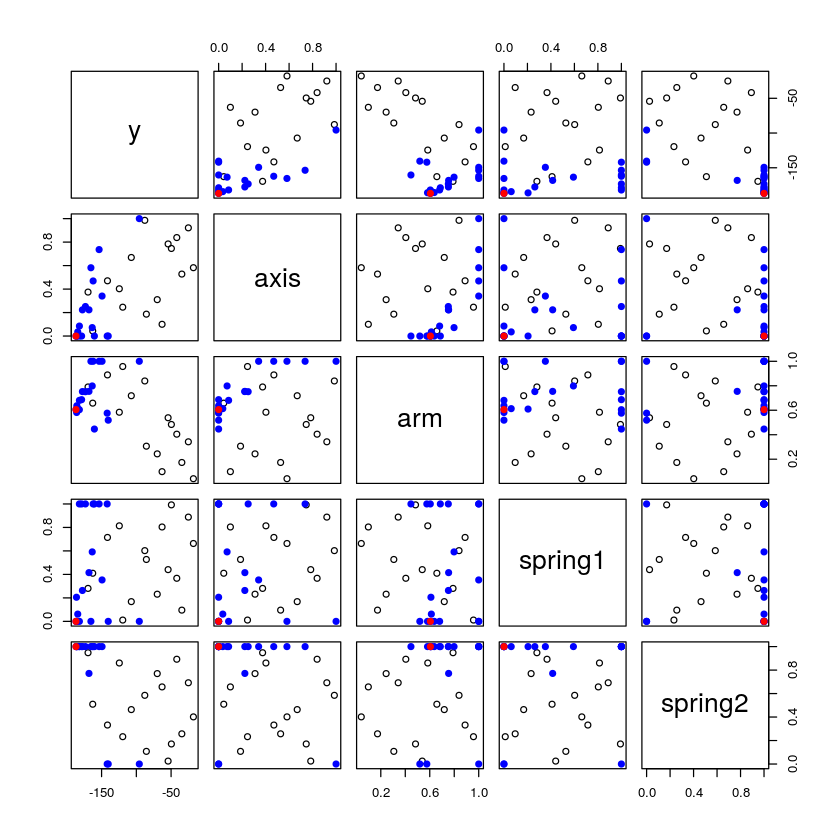

In [10]:
visualizeEGO <- function(initDesign, initValues, EGOpoints, EGOvalues){
  bestIndex <- which.min(EGOvalues)
  y <- c(initValues, EGOvalues, EGOvalues[bestIndex])
  X <- rbind(initDesign, EGOpoints, EGOpoints[bestIndex, ])
  ninit <- nrow(initDesign)
  nsteps <- nrow(EGOpoints)
  pairs(cbind(y, X), 
        col = c(rep("black", ninit), rep("blue", nsteps), "red"),
        pch = c(rep(1, ninit), rep(19, nsteps + 1)))
}

visualizeEGO(initDesign = X, initValues = Y,
             EGOpoints = oEGO$par, EGOvalues = oEGO$val)

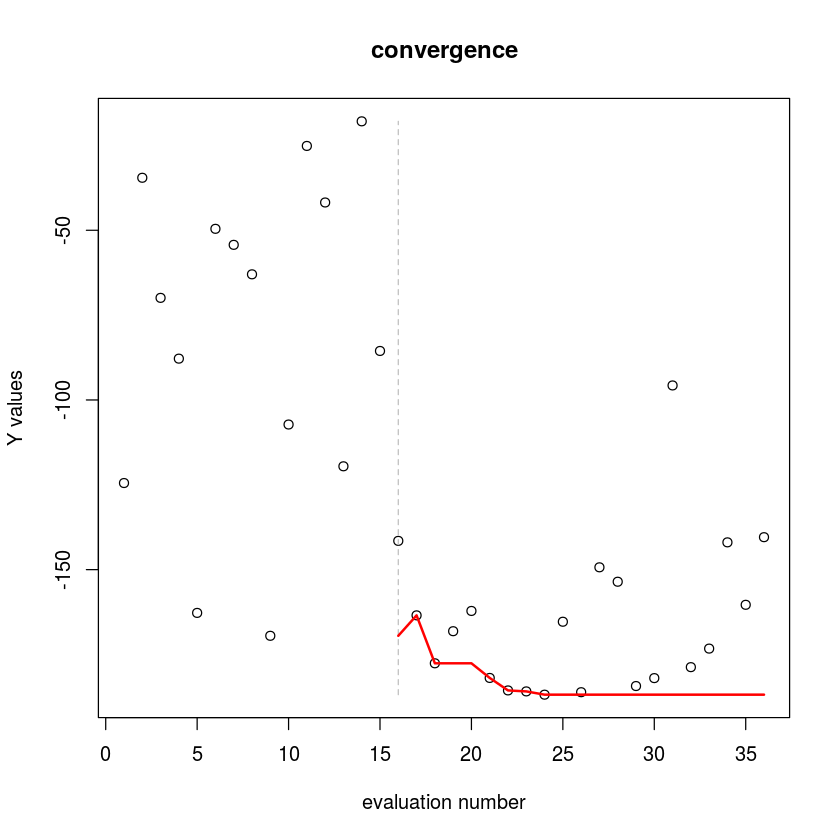

In [11]:
plot(c(Y, oEGO$value), main="convergence", 
     xlab="evaluation number", ylab="Y values")
lines(rep(length(Y), 2), range(Y, oEGO$value), lty = 2, col = "gray")
lines(length(Y) + 0:length(oEGO$value), c(min(Y), cummin(oEGO$value)), col="red", lwd=2)

 Questions : 
 * *Why the EGO method would be much less efficient by using a linear model instead of a GP model?* 
 * *Modify the code in order to investigate the influence of a trend in the model (change formula in 'km'), of a kernel (?km), of the initial sample size.*
 * *Adapt the EGO method in order to provide a batch of 2 points at one (function qEGO.nsteps), which is useful in practice, as the 2 runs of the time-consuming simulator can be done in parallel.*

In [12]:
# try to beat the minimum found by EGO
runExperimentFun(oEGO$par[bestPoint, ])
# do not cheat: do not give this starting point to the optimizer!!

[1] -186.8481